In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
RESULT_DIR = '../results/headline'

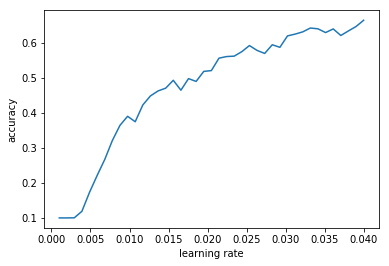

In [2]:
result = pd.read_csv(f'{RESULT_DIR}/lrrt.csv')
df = result[['val_acc', 'lr']]
df.columns = ['accuracy', 'learning rate']
ax = sns.lineplot(x='learning rate', y='accuracy', data=df)

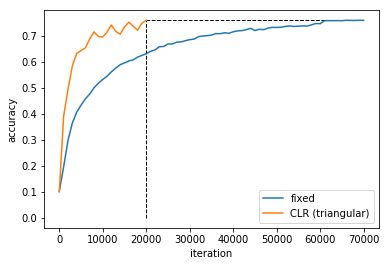

In [50]:
# fixed
results_1 = [pd.read_csv(f'{RESULT_DIR}/fixed_1_{i}.csv') for i in range(1, 6)]
results_2 = [pd.read_csv(f'{RESULT_DIR}/fixed_2_{i}.csv') for i in range(1, 6)]
results_3 = [pd.read_csv(f'{RESULT_DIR}/fixed_3_{i}.csv') for i in range(1, 6)]
accuracy_1 = pd.DataFrame([r['val_acc'] for r in results_1]).mean(axis=0)
accuracy_2 = pd.DataFrame([r['val_acc'] for r in results_2]).mean(axis=0)
accuracy_3 = pd.DataFrame([r['val_acc'] for r in results_3]).mean(axis=0)
accuracy = pd.concat([accuracy_1, accuracy_2, accuracy_3], axis=0, ignore_index=True)
its_1 = results_1[0]['iteration']
its_2 = results_2[0]['iteration'] + 60000
its_3 = results_3[0]['iteration'] + 65000
its = pd.concat([its_1, its_2, its_3], axis=0, ignore_index=True)
f_df = pd.DataFrame({'iteration' : its, 'accuracy' : accuracy}) 
ax = sns.lineplot(x='iteration', y='accuracy', data=f_df, label='fixed')

# triangular
results = [pd.read_csv(f'{RESULT_DIR}/triangular_{i}.csv') for i in range(1, 6)]
accuracy = pd.DataFrame([r['val_acc'] for r in results]).mean(axis=0)
its = results[0]['iteration']
t_df = pd.DataFrame({'iteration' : its, 'accuracy' : accuracy}) 
fixed_idx_max = f_df['accuracy'].idxmax()
fixed_max = f_df.iloc[fixed_idx_max]
y = fixed_max['accuracy']
x_start = t_df[t_df['accuracy'] > y].iloc[0]['iteration']
x_end = fixed_max['iteration'] 
t_df = t_df[t_df['iteration'] <= x_start]
ax.hlines(y, x_start, x_end, linestyle='--', linewidth=1)
ax.vlines(x_start, 0, y, linestyle='--', linewidth=1)
sns.lineplot(x='iteration', y='accuracy', data=t_df, label='CLR (triangular)')